#  Лабораторная работа № 1

# Васильев А.Р. ИУ5-24М

## Создание "истории о данных" (Data Storytelling)

## Задание:
* Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь. Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

* Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    1. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    2. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    3. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    4. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    5. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Был выбран датасет обращений в 911

## Описание датасета

Датасет вызовов 911

## Колонки

* lat - latitude - широта
* lng - longitude - долгота
* desc - description - описание
* zip - zip - почтовый индекс
* title - title - причина вызова
* timestamp - timestamp - дата/время
* twp - township - населенный пункт
* addr - address - адрес
* e - some index - всегда 1

In [331]:
df = pd.read_csv('data/911.csv')

In [332]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [335]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


# Шаг 1. Рассмотрим уникальные типы случаев вызова

In [336]:
{i.split(':')[0] for i in df.title}

{'EMS', 'Fire', 'Traffic'}

In [337]:
df['type_of_emergency'] = df.title.apply(lambda x: x.split(':')[0])

## Barplot

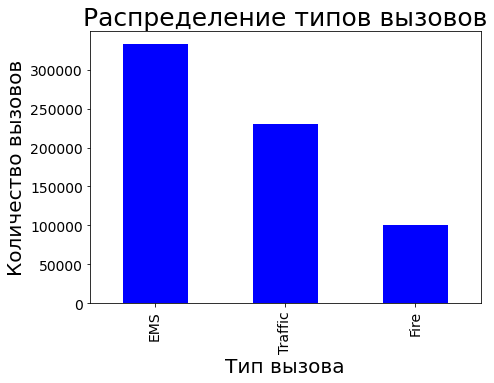

In [339]:
plt.figure(figsize=(7,5))
df['type_of_emergency'].value_counts().plot(kind='bar', cmap='winter')
plt.title('Распределение типов вызовов',fontsize=25)
plt.xlabel('Тип вызова')
plt.ylabel('Количество вызовов')
plt.show()

## Леденец на палочке (lollipop plot)

In [340]:
BIGGER_SIZE = 14
AXES_SIZE = 20

plt.rc('axes', titlesize=AXES_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=AXES_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

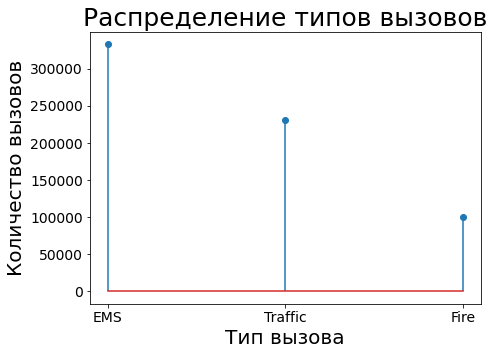

In [341]:
emergency_types_dict = dict(df.type_of_emergency.value_counts())

plt.figure(figsize=(7,5))
plt.stem(emergency_types_dict.keys(), emergency_types_dict.values(),
         linefmt='-', use_line_collection=True)
plt.title('Распределение типов вызовов',fontsize=25)
plt.xlabel('Тип вызова')
plt.ylabel('Количество вызовов')
plt.show()

## Пончик

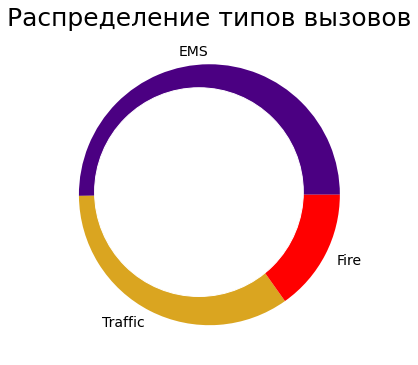

In [342]:
types = list(emergency_types_dict.keys())
# print(types)
sizes = [emergency_types_dict[types[i]]/sum(list(emergency_types_dict.values())) for i in range(len(types))]
# print(sizes)

plt.figure(figsize=(8,6))
my_circle=plt.Circle( (-0.08,0.02), 0.8, color='white')
plt.pie(sizes, labels=types, colors=['indigo', 'goldenrod', 'red'], )
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Распределение типов вызовов',fontsize=25)
plt.show()

# Подытог: 

# Рассмотрим случаи вызова (Event_type)

In [62]:
df['event_type'] = df.title.apply(lambda x: x.split(':')[1])

event_type_dict = dict(df.event_type.value_counts())

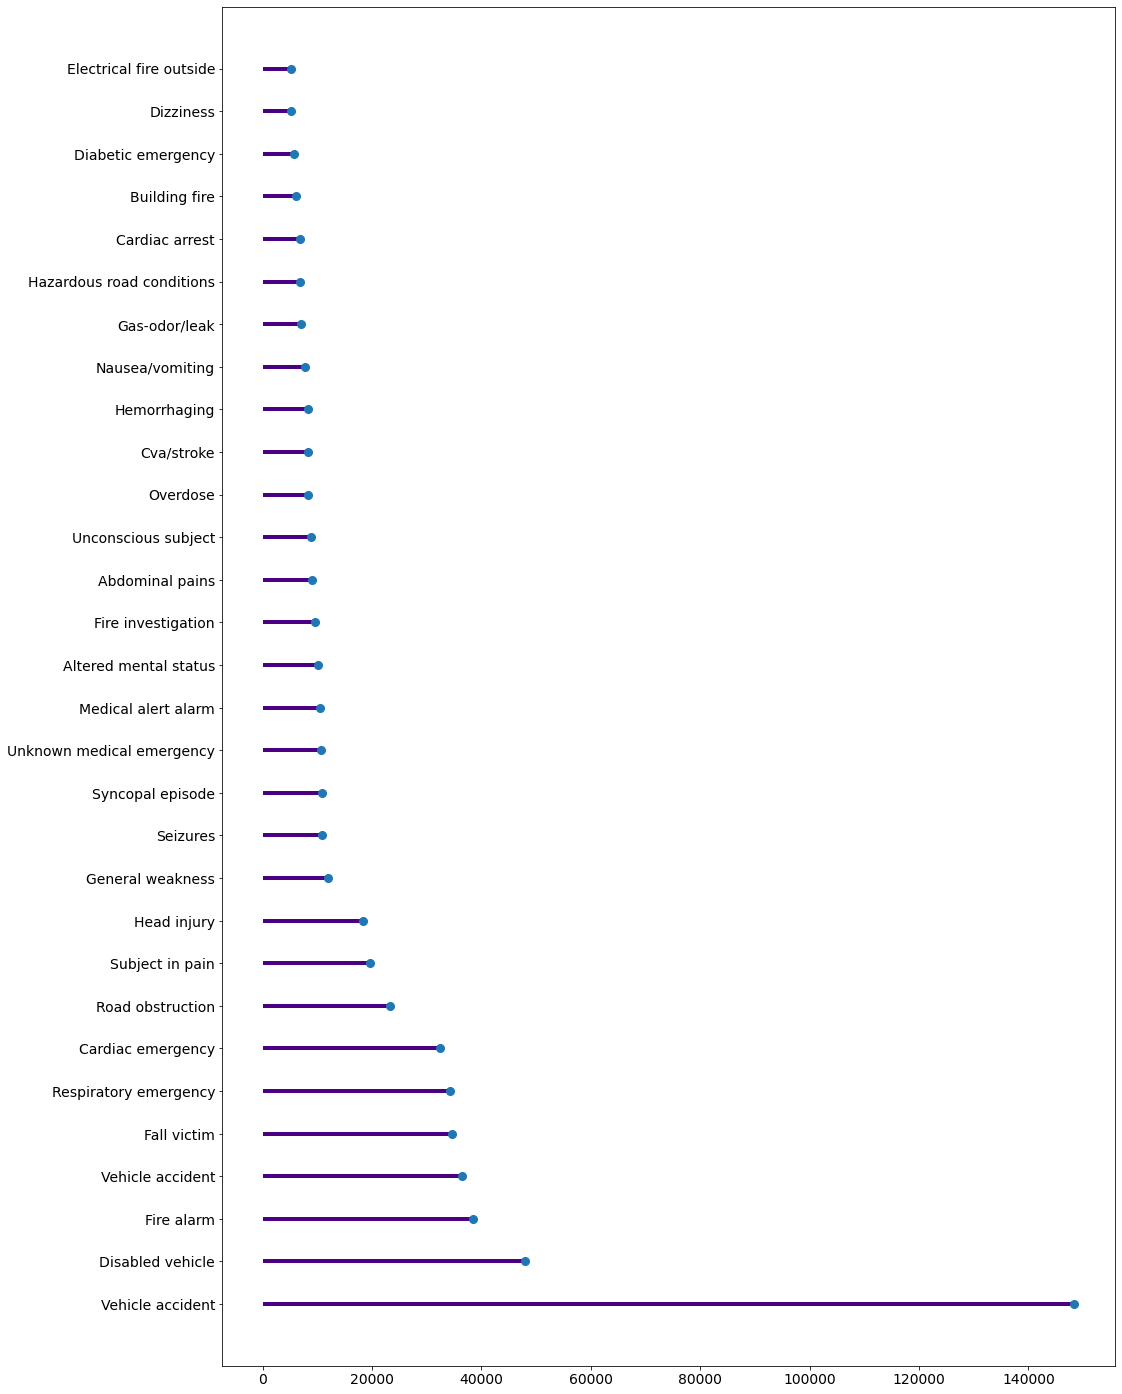

In [63]:
# неудачная попытка

items = [(k.lower().strip('-, ').capitalize(), v) for k,v in event_type_dict.items() if v > 1]
# sorted(items, key=lambda x: x[1], reverse=False)
values = [i[1] for i in items[:30]]
labels = [i[0] for i in items[:30]]

plt.figure(figsize=(16,25))
plt.hlines(y=np.arange(1, 31), xmin=0, xmax=values, color="indigo", zorder=0, linewidths=4)
plt.plot(values, np.arange(1,31), "o", markersize=8)
plt.yticks(np.arange(1,31), labels)
plt.show()

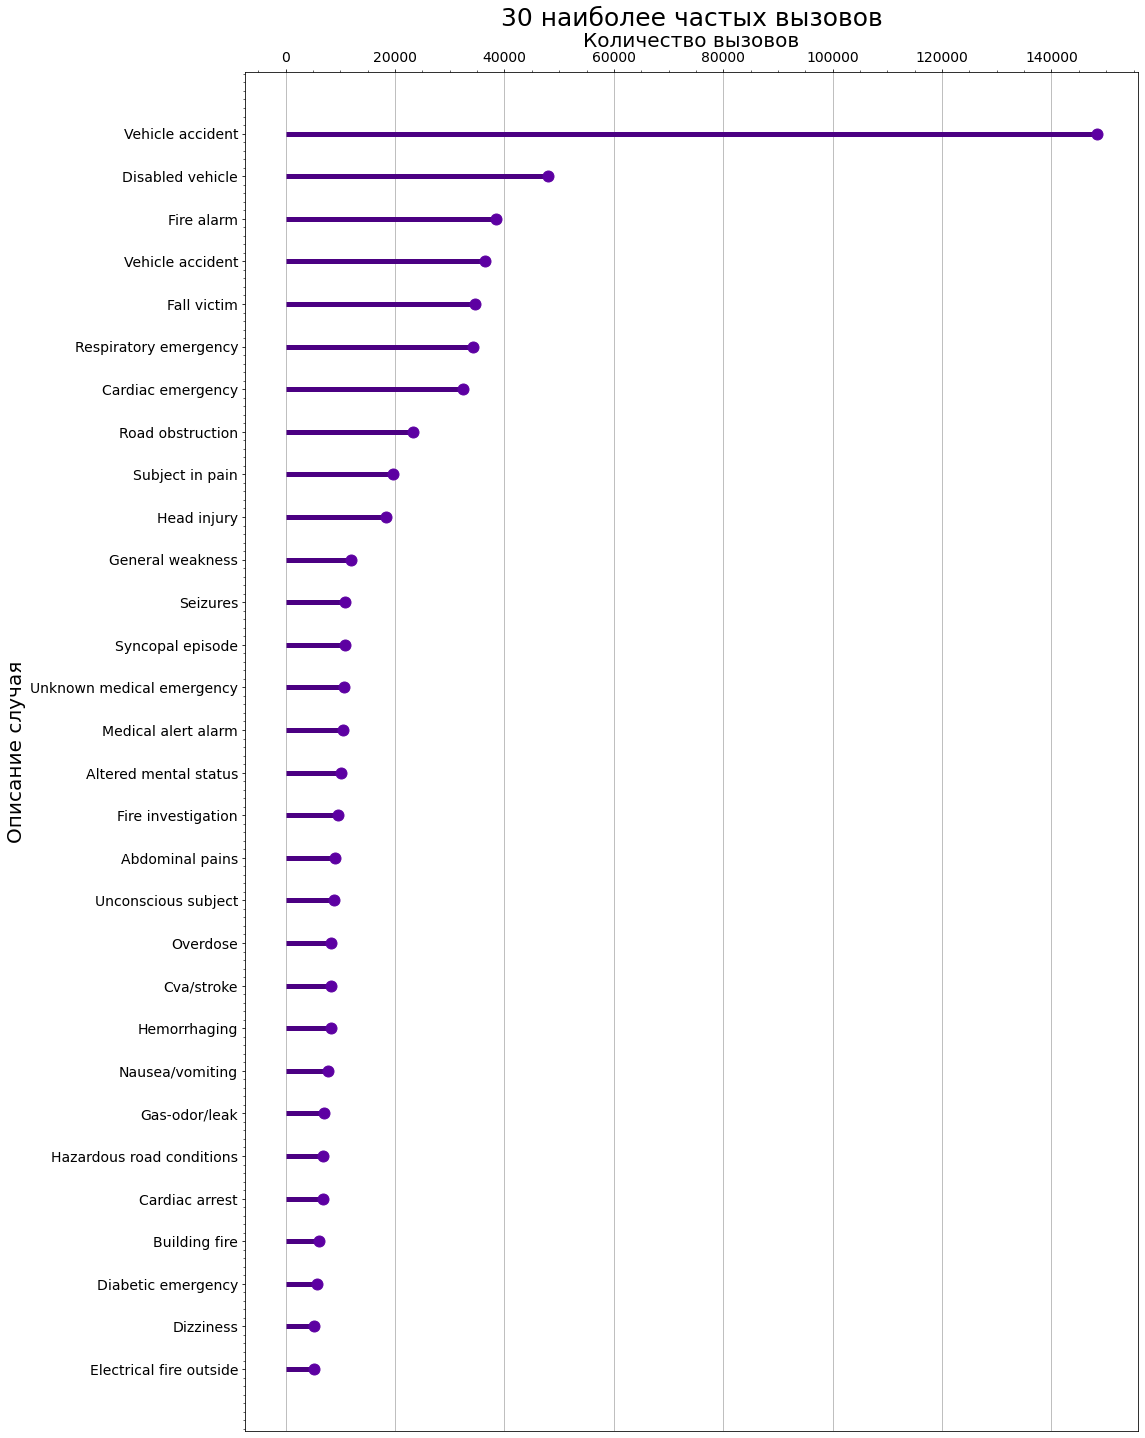

In [69]:
fig = plt.figure(figsize=(16,25))
ax1 = fig.add_subplot(111)
ax1.xaxis.set_label_position('top') 
ax1.xaxis.set_ticks_position('top')

INDIGO_RGBA_COLOR = (0.365, 0, 0.634, 1)

event_types_df = pd.DataFrame({'labels':labels, 'values':values}).sort_values(by='values')

plt.hlines(y=np.arange(1,31), xmin=0, xmax=event_types_df['values'], color='indigo', linewidth=5)
plt.plot(event_types_df['values'], np.arange(1,31), "o", markersize=11,
         markerfacecolor=INDIGO_RGBA_COLOR, markeredgecolor=INDIGO_RGBA_COLOR)
plt.yticks(np.arange(1,31), event_types_df['labels'])
plt.xlabel('Количество вызовов')
plt.ylabel('Описание случая')
plt.minorticks_on()
plt.grid(axis='x')
plt.title('30 наиболее частых вызовов', fontsize=25)
plt.show()

# Рассмотрим количество случаев по дням

In [15]:
df.timeStamp

0         2015-12-10 17:10:52
1         2015-12-10 17:29:21
2         2015-12-10 14:39:21
3         2015-12-10 16:47:36
4         2015-12-10 16:56:52
                 ...         
663517    2020-07-29 15:46:51
663518    2020-07-29 15:52:19
663519    2020-07-29 15:52:52
663520    2020-07-29 15:54:08
663521    2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: object

In [92]:
df['date'] = df.timeStamp.apply(lambda x: x.split(' ')[0].strip())

data = [(label, value) for label,value in dict(df.date.value_counts()).items()]
sorted(data, key=lambda x: x[0])

label = [i[0] for i in data]
value = [i[1] for i in data]

days_df = pd.DataFrame({'День':label, 'Кол-во вызовов':value})

In [93]:
fig = px.area(days_df, x='День', y='Кол-во вызовов', width=1000, height=500,
              title='Количество вызовов по дням')
fig.show()

# Рассмотрим среднее количество вызовов в день по годам

In [253]:
df['year'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
df['day'] = df['date'].apply(lambda x: str(datetime.strptime(x,'%Y-%m-%d').day) +
                             '/' + str(datetime.strptime(x,'%Y-%m-%d').month))

In [303]:
mean_val_per_day_dict = dict(df.groupby(df.year).day.agg(lambda x: x.size/np.unique(x).size))
mean_day_data = [(k,v) for k,v in mean_val_per_day_dict.items()]

year = [i[0] for i in mean_day_data]
vals = [i[1] for i in mean_day_data]

df_tmp = pd.DataFrame({'Год':year, 'Среднее кол-во вызовов в день':vals})

In [330]:
# df_tmp.sort_values(by='day').plot(kind='bar', legend=None)
# plt.title('Среднее количество вызовов в день по годам')
# plt.show()

fig = px.line(df_tmp,x='Год', y='Среднее кол-во вызовов в день', title='Среднее кол-во вызовов в день по годам')
fig.show()

# Рассмотрим процентный прирост по количеству вызовов

In [305]:
df_tmp

,Год,Среднее кол-во вызовов в день
0,2015,359.818182
1,2016,388.961749
2,2017,384.501370
3,2018,415.142466
4,2019,408.542466
5,2020,342.454976


In [326]:
df_tmp['last_day'] = df_tmp['Среднее кол-во вызовов в день'].shift(1)


def add_percent(this, last):
    one_percent = this / 100
    print(one_percent)
    return (this-last) / one_percent


df_tmp['add_percent'] = df_tmp.apply(lambda x:add_percent(x['Среднее кол-во вызовов в день'], x.last_day), axis=1)

df_tmp['add_percent'][0] = 0

3.598181818181818
3.889617486338798
3.8450136986301366
4.151424657534246
4.085424657534246
3.4245497630331756


<ipython-input-326-fcf3b531a523>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [328]:
fig = px.bar(df_tmp, x='Год',
              y='add_percent', title='Процентное изменение количества вызовов относительно прошлого года')
fig.show()

In [329]:
fig = px.line(df_tmp, x='Год',
              y='add_percent', title='Процентное изменение количества вызовов относительно прошлого года')
fig.show()

# Рассмотрим количество вызовов по годам

In [231]:
df['year'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)

labels = []
values = []
for k,v in df['year'].value_counts().items():
    labels.append(k)
    values.append(v)

In [276]:
year_df = pd.DataFrame({'Год':labels, 'Кол-во вызовов':values}).sort_values(by='Год',
                                                                            ascending=True)

In [282]:
fig = px.line(year_df, x='Год', y='Кол-во вызовов', title='Распределение вызовов по годам')
fig.show()

# Рассмотрим частоту вызова относительно дня недели

In [186]:
from datetime import datetime

# getting week day from date
df['week_day'] = df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday())

In [236]:
day_dict = {0:'Вс', 1:'Пн', 2:'Вт', 3:'Ср', 4:'Чт', 5:'Пт', 6:'Сб'}

week_day_data = [(day_dict[labels], values) for labels, values in dict(df.week_day.value_counts()).items()]
sorted(week_day_data, key=lambda x: x[1])
week_day_data

days = [i[0] for i in week_day_data]
count = [i[1] for i in week_day_data]

week_day_df = pd.DataFrame({'День недели':days, 'Кол-во вызовов':count}).sort_values(by='Кол-во вызовов')

In [237]:
fig = px.bar(week_day_df , x="День недели", y='Кол-во вызовов', title="Количество вызовов по дням недели")
fig.show()

# Рассмотрим частоту вызовов относительно времени суток

In [96]:
import time 

df['time'] = df.timeStamp.apply(lambda x: datetime.strptime(x.split(' ')[1].strip(), '%H:%M:%S'))

df['time_categorized'] = df.time.apply(lambda x: 0 if x.hour >= 0 and x.hour < 6
                                       else 1 if x.hour >= 6 and x.hour < 12
                                       else 2 if x.hour >= 12 and x.hour < 18
                                       else 3 if x.hour >= 18 and x.hour <= 23 else -1)

In [98]:
# df.time_categorized.value_counts().plot(kind='bar')

time_interval_dict = {0:'night', 1:'morning', 2:'day', 3:'evening'}

time_data = sorted([(time_interval_dict[k],v) for k,v in df.time_categorized.value_counts().items()],
                   key=lambda x: x[1])

labels = [i[0] for i in time_data]
values = [i[1] for i in time_data]

time_df = pd.DataFrame({'День недели':labels, 'Кол-во вызовов':values})

fig = px.bar(time_df, x='День недели', y='Кол-во вызовов',
             width=900, height=500, title='Распределение вызовов по дням недели')
fig.show()

# Рассмотрим топ 20 городов по вызовам 911

## Не смог найти информацию по населению, чтобы посчитать количество вызовов на 1/100/1000 единиц населения

In [24]:
df.twp.value_counts()

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

In [121]:
city_df = pd.read_csv('data/uscities.csv')


cities = [i.lower().strip() for i in city_df.city.unique()]

df_cities = [i.lower().strip() for i in df.twp.unique() if isinstance(i, str)]

for i in df_cities:
    if 'abington' in cities:
        print('ok')

# Попробуем посмореть распределение вызовов по широте и долготе

In [25]:
df.lat

0         40.297876
1         40.258061
2         40.121182
3         40.116153
4         40.251492
            ...    
663517    40.157956
663518    40.136306
663519    40.013779
663520    40.121603
663521    40.015046
Name: lat, Length: 663522, dtype: float64

In [138]:
SAMPLE_SIZE = 10000

geo_df = df[ (df.lat > 38 ) & (df.lat < 40.5) ]
geo_df = geo_df[ (df.lng > -76) & (df.lng < -74)]

print(geo_df.shape)

geo_df = geo_df.sample(n=SAMPLE_SIZE, random_state=42)

<ipython-input-138-2303c369b4ff>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(662950, 14)


In [139]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_api_key").read())


fig = px.scatter_mapbox(geo_df, lat="lat", lon="lng",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=8, hover_name='twp')
fig.show()

In [164]:
import plotly.express as px
fig = px.density_mapbox(geo_df, lat='lat', lon='lng', radius=2,
                        center=dict(lat=40.17, lon=-75.27), zoom=9.5, 
                        mapbox_style="stamen-terrain", width=1000, height=900, title='Карта случаев')
fig.show()

In [ ]:
8,